# Challenge Data - Module introduction à l'IA

## Classification des images de 2 et de 7

# I. Visualisation des données

On commence par importer les données dont nous aurons besoin :

In [1]:
from utilitaires_mnist_2 import *

/Users/akim/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## I.1 Rappels Python

### Le type list

On définit une liste à l'aide de crochets (rajoutez des print après chaque définition)  :

In [1]:
# liste vide :
liste_vide = []
# une liste peut contenir des nombres :
liste = [1, 5.4, -3]

On accède à l'élément $i$ d'une liste en faisant
`ma_liste[i]`.

<div class="alert alert-block alert-warning">
<b>⚠️ Attention  :</b> En Python les indices sont comptés à partir de 0, le premier élément d'une liste est donc liste[0].
</div>

Avec la fonction `print(...)`, afficher le premier élément de la liste `liste`` :

In [ ]:
# Afficher le premier élément de la liste
...

Pour ajouter des éléments à une liste, on peut utiliser la méthode `append` :

In [ ]:
# Ajouter "8" à la liste
...

## I.2 Image numérique

Une image en niveaux de gris : tableau 2D de $28 \times 28$ pixels. La valeur de chaque pixel est un entier compris entre 0 et 255.

Nous avons créé une fonction `affichage`, vous pouvez directement l'appliquer à la variable `x` :

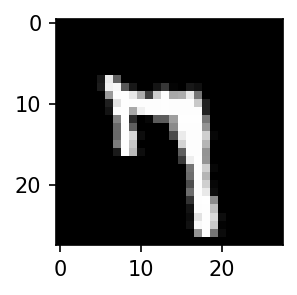

In [3]:
# Affichez l'image x :
affichage(x)

### Accéder à un pixel particulier

On accède à la valeur du pixel $(i,j)$ à la $i+1$-ème ligne et $j+1$-ème colonne par la commande `x[i,j]`. Par exemple, pour accéder à la valeur du pixel central (14,14) on écrit simplement `x[14,14]`. On peut ensuite afficher cette valeur avec `print`.

In [ ]:
# Valeur du pixel (14,14) : 
pixel_central = ...

print(pixel_central)

### Accéder à une « tranche » de pixels

* `x[a:b,c:d]` extrait les pixels appartenant aux lignes `a` à `b-1` (inclus) et colonnes `c` à `d-1` (inclus).
* `x[a:b,c:d]` est un tableau de taille $(b-a) \times (d-c)$.
* Pour récupérer tous les pixels de `x` appartenant aux colonnes `c` à `d-1`, on utilise `x[:,c:d]`; et `x[a:b,:]` pour tous les pixels appartenant aux lignes `a` à `b-1`.

<b><font color=red> Écrire une ligne de code pour afficher uniquement les colonnes 11 à 23 de l'image $x$ :</font></b>

In [ ]:
# Visualisez les colonnes 11 à 23 de l'image x :
...

In [ ]:
# Affichez directement la valeur des pixels des colonnes 11 à 23 de l'image x :
colonnes_centrales = 

print(colonnes_centrales)

# II. Challenge : classer les chiffres 2 et 7

**On a deux classes d'images :**
- la classe des chiffres $2$ : **classe -1**
- la classe des chiffres $7$ : **classe 1**

Pour visualiser les 10 premières images, utiliser la fonction `affichage_dix` :

In [ ]:
# Affiche les 10 premières images de x_train :
affichage_dix(x_train)

## II.1 Choix a priori de la caractéristique

**Benchmark :** Proposition d'un caractéristiques utilisée comme référence

In [3]:
# Une fonction qui calcule et renvoi la caractéristique de l'image x

def caracteristique(x):
    c = moyenne(x)
    return c

Après avoir obtenu l'erreur d'entraînement sur cette caractéristique, <b><font color=red>vous définirez votre propre caractéristique pour faire mieux.</font></b>

## II.2 Classificateur

**Algorithme de classification :**
* On choisit un seuil noté  `t`
* On compare la caractéristique de l'image à `t` et on renvoit l'entier $-1$ ou $1$ :

**Choix du seuil**

Afficher les valeurs de caractéristiques pour des images de `x_train` :

In [ ]:
affichage_dix(x_train)

for i in range(10):
    c = caracteristique(x_train[i])
    y = y_train[i]
    print('Image ' +str(i+1)+' : c(x) = '+str(round(c,2))+',   y = '+str(y)+'\n')

<b><font color=red> D'après ces obervations, choisissez un seuil `t` et complétez la fonction classification :</font></b>

In [ ]:
# Seuil à compléter :

t = ...

<div class="alert alert-block alert-warning">
<b>⚠️ Attention  :</b> cette fonction doit calculer $\hat y$ <b>l'estimation de la classe </b> de $x$, donc $-1$ pour les images de $2$ et $1$ pour les images de $7$.
</div>

In [2]:
# Algorithme de classification à compléter :

def classification(x, t):
    c = caracteristique(x)
    if c > t:
        return ...
    else:
        return ...

## II.3 Calcul de l'erreur d'entraînement pour ce paramètre

L'erreur d'entraînement est la proportion d'images que le classificateur classe mal.  C'est donc :

 
  
$$
e_{train}(t) = \frac{\text{Nombre d'images d'entraînement mal classées}} {\text{Nombre d'images d'entraînement}}
$$
 

Notez que cette fonction dépend du paramètre ``t``.  

<b><font color=red> Exécuter la cellule suivante pour calculer votre erreur d'entraînement :</font></b>

In [ ]:
# calcul de l'erreur d'entraienement grâce 

e_train = erreur_train(x_train, y_train, t, classification)
print("\n \n --> Erreur d'entraînement =", f"{100*e_train:.2f}% \n \n")

Qu'en pensez-vous ? Nous allons maintenant chercher le paramètre `t` qui minimse la fonction erreur.

## II.4 Minimisation de la fonction erreur

Pour trouver le meilleur paramètre ``t`` nous traçons la fonction $e_{train}(t)$ pour trouver son minimum. 

<b><font color=red> Exécuter la cellule suivante pour afficher la fonction erreur :</font></b>

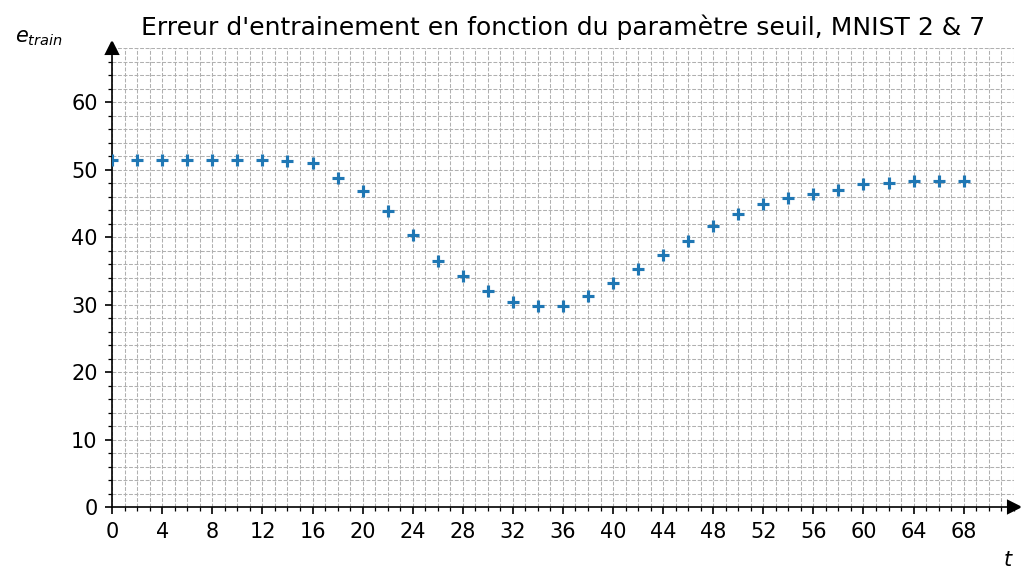

In [5]:
t_min = 0
t_max = 70

tracer_erreur(t_min, t_max, classification)

<b><font color=blue> 1. Quelle valeur de ``t`` pouvez prendre pour avoir le moins d'erreur ? </font></b>
<br>

<br>
<b><font color=blue> 2. Complétez la cellule suivante avec ce seuil et exécutez les 2 cellules suivantes pour obtenir votre nouvelle erreur d'entraînement : 

In [ ]:
# Nouveau seuil à compléter, d'après la figure précédente :

t = ...

In [ ]:
# Calcul de l'erreur d'entraienement avec ce nouveau seuil :  

e_train = erreur_train(x_train, y_train, t, classification)
print("\n \n --> Erreur d'entraînement =", f"{100*e_train:.2f}% \n \n")

## II.5 Amélioration de la caractéristique : faites mieux !


<b><font color=blue>Pour diminuer encore l'erreur, vous allez définir votre propre caractéristique. Utilisez les propriétés des images pour inventer une caractéristique qui fait le moins d'erreur possible ! </font></b>

### 1. Définissez dans la cellule suivante votre caractéristique :

In [ ]:
# Votre propre caractéristique : 

def caracteristique(x):
    
    ...

    return ...

### 2. Réglez la fonction classification : 

Afficher en excécutant la cellule suivante les valeurs de votre caractéristique pour 10 images : 

In [ ]:
affichage_dix(x_train)

for i in range(10):
    c = caracteristique(x_train[i])
    y = y_train[i]
    print('Image ' +str(i+1)+' : c(x) = '+str(round(c,2))+',   y = '+str(y)+'\n')

En déduire comment compléter la fonction de classification : 

In [ ]:
# Algorithme de classification à compléter :

def classification(x, t):
    c = caracteristique(x)
    if c > t:
        return ...
    else:
        return ...

### 3. Choisir un seuil qui minimise la fonction erreur : 

In [ ]:
# Changer t_min et t_max si besoin, pour l'affichage de la courbe d'erreur
t_min = 0
t_max = 80

tracer_erreur(t_min, t_max, classification)

In [ ]:
# Seuil à compléter :

t = ...

In [ ]:
# Calcul de l'erreur d'entraienement avec ce nouveau seuil :  

e_train = erreur_train(x_train, y_train, t, classification)
print("\n \n --> Erreur d'entraînement avec ma caractéristique =", f"{100*e_train:.2f}% \n \n")

## II.6 Soumission sur la plateforme pour obtenir l'erreur de test


<b><font color=red>Une fois que vous être content de votre caractéristique,</font></b> exécuter la cellule suivante : 

In [ ]:
y_est_test = []

for x in x_test_2:
    y_est_test.append(classification(x, t))

# Sauvez et téléchargez vos estimations y_est_test, en entrant le nom du fichier que vous souhaitez
sauver_et_telecharger_mnist_2(y_est_test, 'y_est_test_mnist2.csv')

<b><font color=red>Soumettez ce fichier .csv sur la plateforme Challenge Data</font></b> afin d'obtenir votre erreur de test en cliquant sur **[ce lien](https://challengedata.ens.fr/challenges/116)** (n'oubliez pas au préalable d'être bien connecté).

Quelle est votre erreur de test ?